# MAX DRAWDOWN

In [2]:
import pandas as pd

<AxesSubplot:>

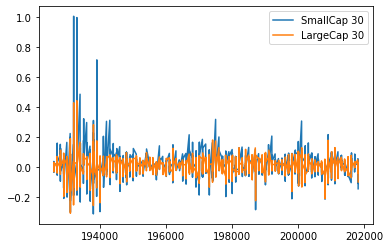

In [15]:
returns = pd.read_csv('MyOwn/Portfolios_Formed_on_ME_monthly_EW.csv',
                     index_col=0,header=0,parse_dates=True,na_values=-99.99)
rets = returns[['Lo 30', 'Hi 30']]
rets.columns = ['SmallCap 30', 'LargeCap 30']
rets = rets/100
rets.plot.line()

In [16]:
rets.head()

,SmallCap 30,LargeCap 30
192607,-0.0043,0.0268
192608,0.0390,0.0209
192609,-0.0108,0.0016
192610,-0.0332,-0.0306
192611,-0.0046,0.0309


In [17]:
rets.index
# we want index to be like time series in monthly periods

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [18]:
rets.index = pd.to_datetime(rets.index,format= '%Y%m')
rets.index = rets.index.to_period('M')
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [19]:
rets['2008']

,SmallCap 30,LargeCap 30
2008-01,-0.0511,-0.0511
2008-02,-0.0264,-0.0287
2008-03,-0.0308,-0.0189
2008-04,0.0095,0.0544
2008-05,0.0311,0.0282
2008-06,-0.0916,-0.1016
2008-07,0.0114,-0.0211
2008-08,0.0202,0.0100
2008-09,-0.1118,-0.1262
2008-10,-0.2118,-0.2076


# Compute Drawdowns
1. Compute a Wealth Index
2. Compute previous peaks
3. compute drawdowns - which is the wealth value as a percentage of the previous peak

In [20]:
# wealth index is the value of the portfolio as it compounds over time
wealth_index = 1000*(1+rets['LargeCap 30']).cumprod()

In [21]:
wealth_index.head()

1926-07    1026.800000
1926-08    1048.260120
1926-09    1049.937336
1926-10    1017.809254
1926-11    1049.259560
Freq: M, Name: LargeCap 30, dtype: float64

<AxesSubplot:>

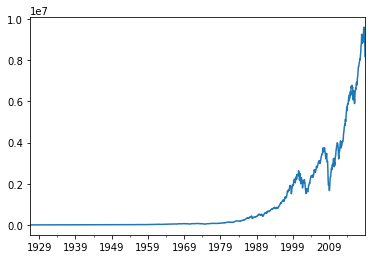

In [22]:
wealth_index.plot.line()

<AxesSubplot:>

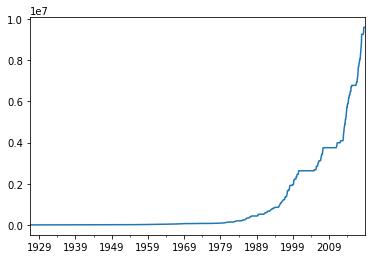

In [25]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

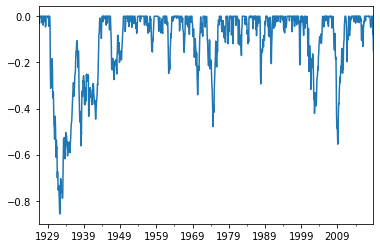

In [26]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [33]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [35]:
drawdown.idxmin()

Period('1932-05', 'M')

In [34]:
drawdown['1990':].idxmin()

Period('2009-02', 'M')

In [36]:
def drawdown(return_series: pd.Series):
    """"
    Takes a time-series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(return_series+1).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown':drawdowns
    })
    

In [37]:
drawdown(rets['LargeCap 30']).head()

,Wealth,Peaks,Drawdown
1926-07,1026.800000,1026.800000,0.000000
1926-08,1048.260120,1048.260120,0.000000
1926-09,1049.937336,1049.937336,0.000000
1926-10,1017.809254,1049.937336,-0.030600
1926-11,1049.259560,1049.937336,-0.000646


In [38]:
drawdown(rets['LargeCap 30'])[['Wealth','Peaks']].head()

,Wealth,Peaks
1926-07,1026.800000,1026.800000
1926-08,1048.260120,1048.260120
1926-09,1049.937336,1049.937336
1926-10,1017.809254,1049.937336
1926-11,1049.259560,1049.937336


<AxesSubplot:>

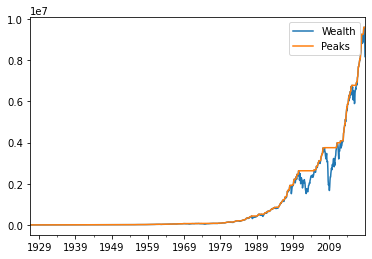

In [39]:
drawdown(rets['LargeCap 30'])[['Wealth','Peaks']].plot()

<AxesSubplot:>

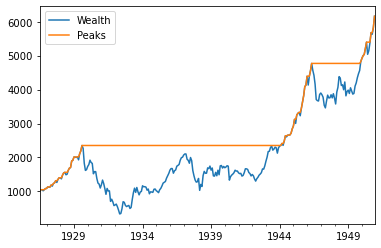

In [41]:
drawdown(rets[:'1950']['LargeCap 30'])[['Wealth','Peaks']].plot()

In [42]:
drawdown(rets['LargeCap 30'])['Drawdown'].min()

-0.8569436338889649

In [43]:
drawdown(rets['LargeCap 30'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [44]:
drawdown(rets['SmallCap 30'])['Drawdown'].min()

-0.8721407191151277

In [45]:
drawdown(rets['SmallCap 30'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [46]:
drawdown(rets['1950':]['SmallCap 30'])['Drawdown'].min()

-0.6855519726762556

In [47]:
drawdown(rets['1950':]['SmallCap 30'])['Drawdown'].idxmin()

Period('1974-12', 'M')